# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

By Saima Rahmanzai
DSC530 Chapter02 Exercise


In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np
import pandas as pd

import nsfg
import first

Given a list of values, there are several ways to count the frequency of each value.

In [2]:
t = [1, 2, 2, 3, 5]

You can use a Python dictionary:

In [3]:
hist = {}
for x in t:
    hist[x] = hist.get(x, 0) + 1
    
hist

{1: 1, 2: 2, 3: 1, 5: 1}

You can use a `Counter` (which is a dictionary with additional methods):

In [4]:
from collections import Counter
counter = Counter(t)
counter

Counter({1: 1, 2: 2, 3: 1, 5: 1})

Or you can use the `Hist` object provided by `thinkstats2`:

In [5]:
import thinkstats2
hist = thinkstats2.Hist([1, 2, 2, 3, 5])
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

`Hist` provides `Freq`, which looks up the frequency of a value.

In [6]:
hist.Freq(2)

2

You can also use the bracket operator, which does the same thing.

In [7]:
hist[2]

2

If the value does not appear, it has frequency 0.

In [8]:
hist[4]

0

The `Values` method returns the values:

In [9]:
hist.Values()

dict_keys([1, 2, 3, 5])

So you can iterate the values and their frequencies like this:

In [10]:
for val in sorted(hist.Values()):
    print(val, hist[val])

1 1
2 2
3 1
5 1


Or you can use the `Items` method:

In [11]:
for val, freq in hist.Items():
     print(val, freq)

1 1
2 2
3 1
5 1


`thinkplot` is a wrapper for `matplotlib` that provides functions that work with the objects in `thinkstats2`.

For example `Hist` plots the values and their frequencies as a bar graph.

`Config` takes parameters that label the x and y axes, among other things.

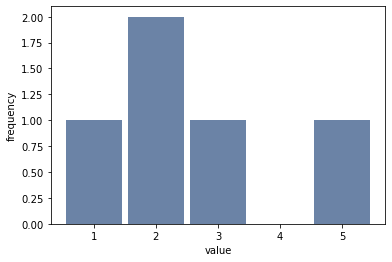

In [12]:
import thinkplot
thinkplot.Hist(hist)
thinkplot.Config(xlabel='value', ylabel='frequency')

As an example, I'll replicate some of the figures from the book.

First, I'll load the data from the pregnancy file and select the records for live births.

In [13]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

Here's the histogram of birth weights in pounds.  Notice that `Hist` works with anything iterable, including a Pandas Series.  The `label` attribute appears in the legend when you plot the `Hist`. 

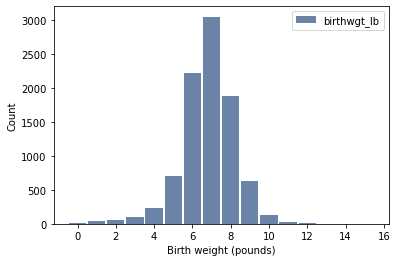

In [14]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

Before plotting the ages, I'll apply `floor` to round down:

In [20]:
ages = np.floor(live.agepreg)

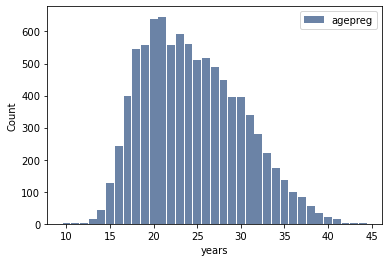

In [21]:
hist = thinkstats2.Hist(ages, label='agepreg')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='years', ylabel='Count')

As an exercise, plot the histogram of pregnancy lengths (column `prglngth`).

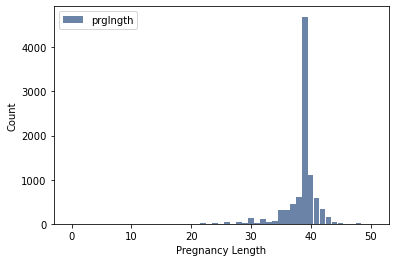

In [23]:
hist = thinkstats2.Hist(live.prglngth, label='prglngth')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Pregnancy Length', ylabel='Count')

`Hist` provides smallest, which select the lowest values and their frequencies.

In [24]:
for weeks, freq in hist.Smallest(10):
    print(weeks, freq)

0 1
4 1
9 1
13 1
17 2
18 1
19 1
20 1
21 2
22 7


Use `Largest` to display the longest pregnancy lengths.

In [26]:
for weeks, freq in hist.Largest(10):
    print(weeks, freq)

50 2
48 7
47 1
46 1
45 10
44 46
43 148
42 328
41 587
40 1116


From live births, we can select first babies and others using `birthord`, then compute histograms of pregnancy length for the two groups.

In [56]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = thinkstats2.Hist(firsts.prglngth, label='first')
other_hist = thinkstats2.Hist(others.prglngth, label='other')

We can use `width` and `align` to plot two histograms side-by-side.

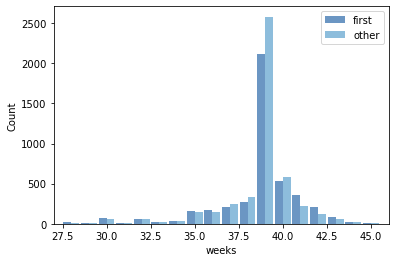

In [31]:
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count', xlim=[27, 46])

`Series` provides methods to compute summary statistics:

In [32]:
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()

Here are the mean and standard deviation:

In [33]:
mean, std

(38.56055968517709, 2.702343810070593)

As an exercise, confirm that `std` is the square root of `var`:

In [36]:
import math
math.sqrt(var)
#As seen above, I used the math function to perform a square root on the variance already calculated.  
#It came to the same value as the standard deviation of 2.702 which confirms that std is the
#square root of variance.

2.702343810070593

Here's are the mean pregnancy lengths for first babies and others:

In [37]:
firsts.prglngth.mean(), others.prglngth.mean()

(38.60095173351461, 38.52291446673706)

And here's the difference (in weeks):

In [38]:
firsts.prglngth.mean() - others.prglngth.mean()

0.07803726677754952

This functon computes the Cohen effect size, which is the difference in means expressed in number of standard deviations:

In [41]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

Compute the Cohen effect size for the difference in pregnancy length for first babies and others.

In [73]:
group1 = live[live.birthord == 1] #Firsts
group2 = live[live.birthord != 1] #Others

diff = group1.prglngth.mean() - group2.prglngth.mean() #diff is 0.078

var1 = group1.prglngth.var()
var2 = group2.prglngth.var()
n1, n2 = len(group1), len(group2)

pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
d = diff / np.sqrt(pooled_var)
   
print(d)



0.028879044654449883


## Exercises

Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier than others. 

Compute Cohen’s effect size to quantify the difference between the groups.  How does it compare to the difference in pregnancy length?

In [65]:
group1 = live[live.birthord == 1] #Firsts
group2 = live[live.birthord != 1] #Others

diff2 = group1.totalwgt_lb.mean() - group2.totalwgt_lb.mean()
diff2
#On an aggregate, the mean of totalwgt_lbs is smaller than that of others but only slightly.

-0.12476118453549034

In [71]:

var1 = group1.totalwgt_lb.var()
var2 = group2.totalwgt_lb.var()
n1, n2 = len(group1), len(group2)

n1 #There are 4413 firsts
n2 #There are 4735 others

pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
d2 = diff / np.sqrt(pooled_var)
   
print(d2)

   

# The Cohen's difference is not very signifant 0.05 especially when the firsts numbers are also smaller
# than the others group that could effect the results.



0.055464308804653806


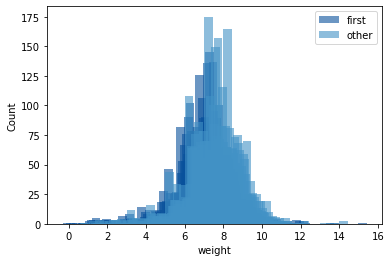

In [80]:
# import matplotlib.pyplot as plt
# %matplotlib inline

firsts = live[live.birthord == 1] #Firsts
others = live[live.birthord != 1] #Others
first_hist = thinkstats2.Hist(firsts.totalwgt_lb, label='first')
other_hist = thinkstats2.Hist(others.totalwgt_lb, label='other')

width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weight', ylabel='Count')


For the next few exercises, we'll load the respondent file:

In [35]:
#Understanding teh ReadFemResp and the variable totincr prior to creating the histogram
resp = nsfg.ReadFemResp()
resp.head()
resp.columns
resp.info
resp2=resp[["caseid","totincr"]]
resp2.head()
resp2.totincr.value_counts().sort_index()


1      299
2      301
3      266
4      421
5      445
6      559
7      583
8      606
9      607
10     468
11     647
12     658
13     623
14    1160
Name: totincr, dtype: int64

In [36]:
resp2.totincr.value_counts().sum()
#per the codebook, total value label total was 7643 and was validated with the data with the command 
#above.

7643

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=FEM&section=R&subSec=7876&srtLabel=607543).

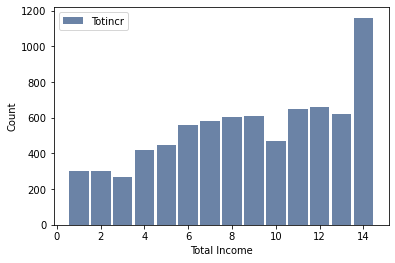

In [37]:
hist = thinkstats2.Hist(resp2.totincr, label='Totincr')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Total Income', ylabel='Count')

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

In [38]:
resp = nsfg.ReadFemResp()
resp.head()
resp3=resp[["caseid","age_r"]]
resp3.head()
resp3.age_r.value_counts().sort_index()

15    217
16    223
17    234
18    235
19    241
20    258
21    267
22    287
23    282
24    269
25    267
26    260
27    255
28    252
29    262
30    292
31    278
32    273
33    257
34    255
35    262
36    266
37    271
38    256
39    215
40    256
41    250
42    215
43    253
44    235
Name: age_r, dtype: int64

In [40]:
resp3.age_r.value_counts().sum()

7643

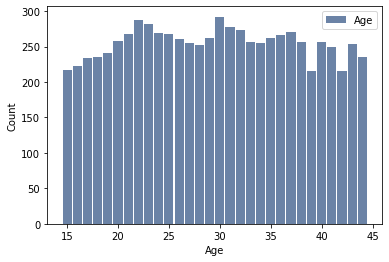

In [41]:
# Histogram for age_r
hist = thinkstats2.Hist(resp3.age_r, label='Age')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Age', ylabel='Count')

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

In [42]:
resp = nsfg.ReadFemResp()
resp.head()
resp4=resp[["caseid","numfmhh"]]
resp4.head()
resp4.numfmhh.value_counts().sort_index()

0     942
1    1716
2    1826
3    1740
4     906
5     313
6     118
7      78
8       4
Name: numfmhh, dtype: int64

In [43]:
resp4.numfmhh.value_counts().sum()

7643

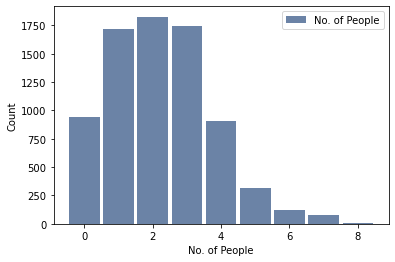

In [44]:
# Histogram for numfmhh
hist = thinkstats2.Hist(resp4.numfmhh, label='No. of People')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='No. of People', ylabel='Count')

Make a histogram of <tt>parity</tt>, the number of children borne by the respondent.  How would you describe this distribution?

In [46]:
resp = nsfg.ReadFemResp()
resp.head()
resp5=resp[["caseid","parity"]]
resp5.head()
resp5.parity.value_counts().sort_index()

0     3230
1     1519
2     1603
3      828
4      309
5       95
6       29
7       15
8        8
9        2
10       3
16       1
22       1
Name: parity, dtype: int64

In [47]:
resp5.parity.value_counts().sum()

7643

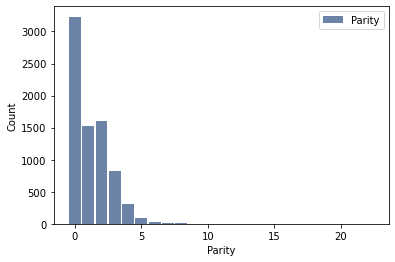

In [48]:
# Histogram for parity
hist = thinkstats2.Hist(resp5.parity, label='Parity')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Parity', ylabel='Count')
#Parity is defined as the number of times that a respondent has given birth to a fetus with a gestational
#age of 24 weeks or more. The graph shows 0 babies to respondents being the highest value.  More 
#testing below.

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [50]:
import thinkstats2
hist = thinkstats2.Hist(resp5.parity)
hist

Hist({0: 3230, 2: 1603, 1: 1519, 3: 828, 4: 309, 5: 95, 6: 29, 7: 15, 8: 8, 10: 3, 9: 2, 22: 1, 16: 1})

In [69]:
for parity, freq in hist.Largest(10):
    print(parity, freq)
# or   
group1.parity.value_counts().sort_index()

8 1
7 1
5 5
4 19
3 123
2 267
1 229
0 515


0    515
1    229
2    267
3    123
4     19
5      5
7      1
8      1
Name: parity, dtype: int64

Let's investigate whether people with higher income have higher parity.  Keep in mind that in this study, we are observing different people at different times during their lives, so this data is not the best choice for answering this question.  But for now let's take it at face value.

Use <tt>totincr</tt> to select the respondents with the highest income (level 14).  Plot the histogram of <tt>parity</tt> for just the high income respondents.

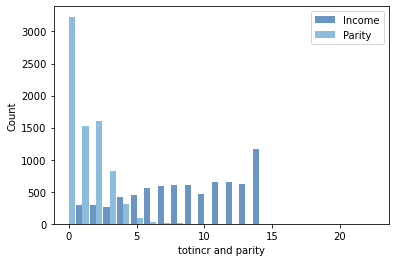

In [54]:


Income = resp2.totincr
Parity = resp5.parity
Income_hist = thinkstats2.Hist(Income, label='Income')
Parity_hist = thinkstats2.Hist(Parity, label='Parity')

width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(Income_hist, align='right', width=width)
thinkplot.Hist(Parity_hist, align='left', width=width)
thinkplot.Config(xlabel='totincr and parity', ylabel='Count')
#As shown by the histogram below, the incomee and parity are on the opposite ends.  High parity
#showing 0 babies appear to be corresponding with low income group.

Find the largest parities for high income respondents.

In [68]:
group1 = resp6[resp6.totincr == 14] #High income

import thinkstats2
hist = thinkstats2.Hist(group1.parity)
hist

for parity, freq in hist.Largest(10):
    print(parity, freq)



8 1
7 1
5 5
4 19
3 123
2 267
1 229
0 515


Compare the mean <tt>parity</tt> for high income respondents and others.

In [60]:
group1 = resp6[resp6.totincr == 14] #High income
group2 = resp6[resp6.totincr != 14] #Others

diff3 = group1.parity.mean() - group2.parity.mean()
diff3

-0.17371374470099532

Compute the Cohen effect size for this difference.  How does it compare with the difference in pregnancy length for first babies and others?

In [65]:
var1 = group1.parity.var()
var2 = group2.parity.var()
n1, n2 = len(group1), len(group2)

n1 #There are 1160 records with high income
n2 #There are 6483 records with not high income

pooled_var3 = (n1 * var1 + n2 * var2) / (n1 + n2)
d3 = diff3 / np.sqrt(pooled_var3)
   
print(d3)

-0.1251185531466061


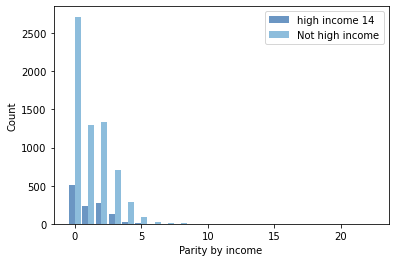

In [62]:
group1 = resp6[resp6.totincr == 14] #High income
group2 = resp6[resp6.totincr != 14] #Others
first_hist = thinkstats2.Hist(group1.parity, label='high income 14')
other_hist = thinkstats2.Hist(group2.parity, label='Not high income')

width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='Parity by income', ylabel='Count')